## Předvýběr území na základě limitujících podmínek
Karolína Fenclová, Diplomová práce

Skript pro analýzu hodnot pro základní kritéria

In [1]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals
import pandas as pd

In [2]:
# soubor 34 tisíc variant = všechny kombinace intersect železnice AND completly within hranice ČR AND UTM33 zone
df = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\Nove_predvyber_vysledky34tis.csv").set_index('ID')
df.head()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
ID,,,,,,
1,2916.80,268.0,100013.45,13477.08,197106.33,452304.47
2,1746.48,211.0,75317.79,11445.57,106362.35,598476.56
3,3037.87,273.0,102853.89,20013.60,27378.37,169553.29
4,1496.63,236.0,1253150.84,7025.02,609169.86,716973.51
5,6191.81,193.0,511724.21,15890.52,269874.62,317985.96


In [3]:
df.describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,34166.000000,34166.000000,3.416600e+04,34166.000000,3.416600e+04,3.416600e+04
mean,5392.621366,119.364397,2.508810e+05,12096.330259,4.750117e+04,1.411995e+06
std,5862.627946,87.677140,4.994635e+05,5793.069204,3.359728e+05,1.445075e+06
min,0.230000,1.000000,1.000000e+00,0.000000,0.000000e+00,5.800000e-01
25%,2495.820000,54.000000,3.893772e+04,8151.820000,0.000000e+00,5.985002e+05
50%,4430.760000,98.000000,1.019114e+05,12080.370000,1.979600e+03,9.761296e+05
75%,6196.270000,162.000000,2.613735e+05,15804.592500,1.709619e+04,1.662835e+06
max,95250.270000,690.000000,1.017666e+07,41613.460000,1.159171e+07,1.535264e+07


### Analýza hodnot kritérií pro předvýběr (34 tisíc variant)

Text(0.5,0,u'D\xe9lka \u017eeleznice [m]')

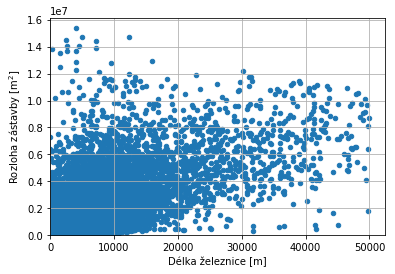

In [106]:
# závislost délky železnice a rozlohy zástavby
a = df[df.zeleznice_delka <= 50000]
ax= a.sort_values(by=['zeleznice_delka']).plot(x='zeleznice_delka', 
                                                                y='zastavba_rozloha', 
                                                                kind='scatter', 
                                                                ylim=0, xlim=0, 
                                                                grid=True)

ax.set_ylabel(r'Rozloha zástavby [m$^2$]') 
# TODO pro graf změnit m2 na km2
ax.set_xlabel('Délka železnice [m]')
# TODO pro graf změnit m na km

Text(0,0.5,u'Po\u010det variant')

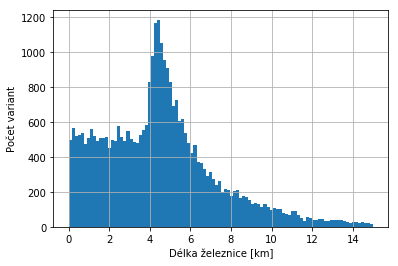

In [107]:
# histogram délky železnice
d = df.zeleznice_delka[df.zeleznice_delka <= 15000]
dx = (d/1000).hist(bins=100)
dx.set_xlabel('Délka železnice [km]')
dx.set_ylabel('Počet variant')
# TODO: jak nastavit rozsah os u histogramu?
# TODO: jak si poradit s rozdílnou šířkou sloupců? 

In [6]:
# PODMÍNKA: délka železnice
zeleznice_delka_min = 3000
zeleznice_delka_max = 10000

df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,20815.000000,20815.000000,2.081500e+04,20815.000000,2.081500e+04,2.081500e+04
mean,5407.233793,117.967668,2.510802e+05,12364.169689,4.470903e+04,1.287449e+06
std,1625.858989,87.364416,4.927752e+05,5724.969691,3.107577e+05,1.093313e+06
min,3000.140000,1.000000,1.000000e+00,0.000000,0.000000e+00,4.043600e+02
25%,4232.315000,53.000000,4.303593e+04,8528.750000,0.000000e+00,6.243429e+05
50%,4980.100000,97.000000,1.065517e+05,12357.840000,1.903630e+03,9.979901e+05
75%,6301.100000,160.000000,2.595220e+05,16034.910000,1.670704e+04,1.608132e+06
max,9999.850000,637.000000,9.779810e+06,41292.720000,1.070742e+07,1.535264e+07


Text(0,0.5,u'Po\u010det variant')

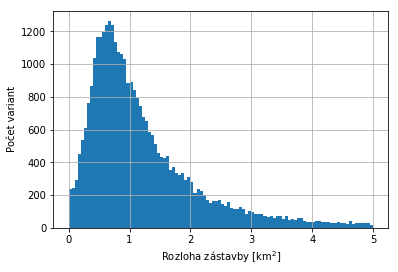

In [109]:
# histogram rozlohy zástavby
d = df.zastavba_rozloha[df.zastavba_rozloha <= 5*1000*1000] # 5km2
dx = (d/1000/1000).hist(bins=100)
dx.set_xlabel('Rozloha zástavby [km$^2$]')
dx.set_ylabel('Počet variant')

In [8]:
# PODMÍNKA: výskyt zástavby
zastavba_rozloha_min = 0.2*1000*1000 #0,2 km2 ve skutečnosti (velmi řídké osídlení)
zastavba_rozloha_max = 2*1000*1000   #2km2 ve skutečnosti (1/8 území) 2cm2 v mapě 1 : 50 000 2*(2*500)**2

df[(df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)].describe()


,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,26635.000000,26635.000000,2.663500e+04,26635.000000,2.663500e+04,2.663500e+04
mean,4237.849545,119.878581,2.387247e+05,12460.291340,3.917639e+04,9.268750e+05
std,2879.848898,88.498321,5.116070e+05,5671.001322,2.661103e+05,4.472109e+05
min,0.230000,1.000000,1.000000e+00,0.000000,0.000000e+00,2.001099e+05
25%,2228.070000,55.000000,3.496526e+04,8680.950000,0.000000e+00,5.721779e+05
50%,4209.340000,98.000000,9.164713e+04,12526.690000,1.394580e+03,8.503664e+05
75%,5494.570000,161.000000,2.337868e+05,16129.020000,1.406489e+04,1.231483e+06
max,58807.290000,690.000000,1.017666e+07,41613.460000,9.731709e+06,1.999912e+06


In [9]:
# železnice AND zástavba
df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
    (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,16784.000000,16784.000000,1.678400e+04,16784.000000,1.678400e+04,1.678400e+04
mean,5260.653352,117.899428,2.462338e+05,12583.102898,3.853450e+04,9.552695e+05
std,1530.570492,88.400648,5.054949e+05,5682.130985,2.620018e+05,4.460329e+05
min,3000.140000,1.000000,1.000000e+00,0.000000,0.000000e+00,2.001099e+05
25%,4192.180000,53.000000,3.972783e+04,8810.182500,0.000000e+00,6.011838e+05
50%,4877.860000,96.000000,1.001702e+05,12627.885000,1.507170e+03,8.902476e+05
75%,6040.435000,158.000000,2.478518e+05,16265.507500,1.432223e+04,1.262935e+06
max,9996.430000,637.000000,9.779810e+06,41292.720000,9.731709e+06,1.999912e+06


Text(0,0.5,u'Po\u010det variant')

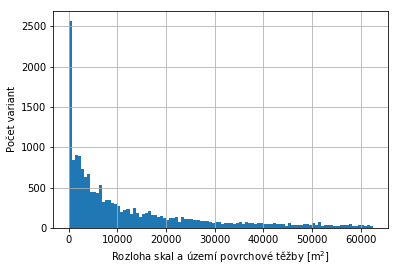

In [10]:
# histogram rozlohy skal a povrchové těžby
d = df.relief_rozloha[(df.relief_rozloha > 0) & (df.relief_rozloha <= 250*250)]
dx = d.hist(bins=100)
dx.set_xlabel('Rozloha skal a území povrchové těžby [m$^2$]')
dx.set_ylabel('Počet variant')

In [11]:
# PODMÍNKA: maximalni povolena rozloha skal a povrchové těžby
relief_rozloha_max = 1*250*250 # 1cm2 v mapě 1 : 25 000

df[(df.relief_rozloha <= relief_rozloha_max)].describe()


,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,30331.000000,30331.000000,3.033100e+04,30331.000000,30331.000000,3.033100e+04
mean,5254.143186,112.324618,2.354362e+05,12207.920227,7445.659614,1.370079e+06
std,5615.852208,82.001656,4.751888e+05,5772.558121,12983.663647,1.373165e+06
min,0.230000,1.000000,1.000000e+00,0.000000,0.000000,5.800000e-01
25%,2455.270000,52.000000,3.759231e+04,8311.130000,0.000000,5.983624e+05
50%,4394.260000,92.000000,9.802908e+04,12215.890000,646.040000,9.621664e+05
75%,6081.660000,150.000000,2.461182e+05,15920.945000,8848.325000,1.613815e+06
max,95250.270000,612.000000,1.017666e+07,41613.460000,62490.180000,1.450715e+07


Text(0,0.5,u'Po\u010det variant')

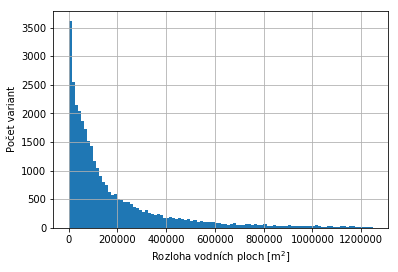

In [110]:
# histogram rozlohy vodních ploch
d = df.vodni_plohy_rozloha[(df.vodni_plohy_rozloha < 5*500*500)]
dx = d.hist(bins=100)
dx.set_xlabel('Rozloha vodních ploch [m$^2$]')
dx.set_ylabel('Počet variant')

In [13]:
# PODMÍNKA: výskyt vodní plochy
vodni_plohy_min = 500*500 # 1cm2 v mapě 1 : 50 000 (možno použít i při bližším neurčení, jestli je vodní plocha opravdu ideální nádrž)

df[(df.vodni_plohy_rozloha >= vodni_plohy_min)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,8924.000000,8924.000000,8.924000e+03,8924.000000,8.924000e+03,8.924000e+03
mean,6881.033103,97.261542,7.304966e+05,11426.895309,5.062525e+04,1.731719e+06
std,7818.555803,81.819135,7.946405e+05,5797.328108,1.597457e+05,1.721401e+06
min,1.760000,1.000000,2.500288e+05,0.000000,0.000000e+00,5.800000e-01
25%,3193.155000,39.000000,3.338222e+05,7312.460000,0.000000e+00,6.526166e+05
50%,4826.610000,76.000000,4.773444e+05,11270.020000,4.350910e+03,1.137970e+06
75%,7575.812500,128.000000,7.860588e+05,15133.905000,3.274997e+04,2.135976e+06
max,95250.270000,690.000000,1.017666e+07,41292.720000,5.707755e+06,1.392823e+07


Text(0,0.5,u'Po\u010det variant')

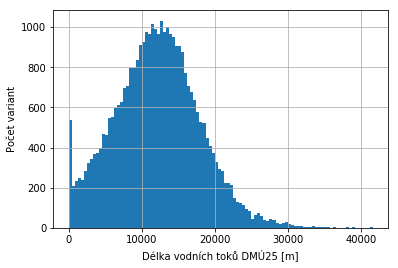

In [111]:
# histogram délky vodních toků
d = df.dibA02_delka #[(df.vodni_plohy_rozloha < 5*500*500)]
dx = d.hist(bins=100)
dx.set_xlabel('Délka vodních toků DMÚ25 [m]')
dx.set_ylabel('Počet variant')
# zde problém s vypovídající hodnotou dat = některé vodní toky jako vodní plochy

In [112]:
# PODMÍNKA délka vodních toků (dmú25)
dibA02_delka_min = 5000 # zhruba průměr +- 7000 m
dibA02_delka_max = 20000

df[(df.dibA02_delka >= dibA02_delka_min) & (df.dibA02_delka <= dibA02_delka_max)].describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,27287.000000,27287.000000,2.728700e+04,27287.000000,2.728700e+04,2.728700e+04
mean,5080.619034,123.292923,2.401093e+05,12333.940397,3.580117e+04,1.343851e+06
std,4775.370902,87.939005,4.356000e+05,3804.454353,1.799021e+05,1.244925e+06
min,0.230000,1.000000,1.000000e+00,5002.170000,0.000000e+00,5.800000e-01
25%,2452.660000,58.000000,4.108452e+04,9364.020000,0.000000e+00,5.985098e+05
50%,4410.450000,102.000000,1.028422e+05,12337.830000,2.018130e+03,9.734651e+05
75%,6074.605000,167.000000,2.589784e+05,15284.445000,1.692846e+04,1.636332e+06
max,71260.670000,690.000000,7.291415e+06,19998.520000,8.481575e+06,1.249052e+07


In [114]:
# železnice AND zástavba AND reliéf_min AND vodní plocha AND délka dibavod řek

vybrano1 = df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
                (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)&
                (df.relief_rozloha <= relief_rozloha_max) &
                (df.vodni_plohy_rozloha >= vodni_plohy_min) &
                (df.dibA02_delka >= dibA02_delka_min) & (df.dibA02_delka <= dibA02_delka_max)]
vybrano1.describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2.928000e+03
mean,5291.464344,87.375683,7.099796e+05,12524.921411,8163.800512,9.579480e+05
std,1547.467887,64.800598,7.286193e+05,3833.137598,13445.219282,4.481918e+05
min,3000.300000,2.000000,2.500425e+05,5016.910000,0.000000,2.001099e+05
25%,4209.470000,42.000000,3.313262e+05,9501.867500,0.000000,5.975266e+05
50%,4852.090000,75.000000,4.595832e+05,12664.165000,1342.035000,8.811042e+05
75%,6148.100000,113.000000,7.711696e+05,15528.375000,9769.167500,1.263395e+06
max,9996.430000,480.000000,7.291415e+06,19979.540000,61746.620000,1.998518e+06


In [115]:
# oprava chyby (dibavod byly řeky dmú25) > chci i vše menší než podmínka u řek

vybrano1_doplnek1 = df[(df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
                (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)&
                (df.relief_rozloha <= relief_rozloha_max) &
                (df.vodni_plohy_rozloha >= vodni_plohy_min) &
                #(df.dibA02_delka >= dibA02_delka_min) & # nastaveno jen horní omezení, kvuli dmú25 x dibavod
                 (df.dibA02_delka <= dibA02_delka_min)] # jako doplněk délka < min
vybrano1_doplnek1.describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,311.000000,311.000000,3.110000e+02,311.000000,311.000000,3.110000e+02
mean,5208.921608,49.054662,9.891691e+05,2813.754277,8205.956913,1.087515e+06
std,1578.058219,63.867758,1.464718e+06,1464.722444,13856.173902,4.602863e+05
min,3000.140000,2.000000,2.510476e+05,0.000000,0.000000,2.006143e+05
25%,4167.495000,18.500000,3.185602e+05,1519.650000,0.000000,7.111544e+05
50%,4841.690000,34.000000,5.274642e+05,3014.180000,131.500000,1.088186e+06
75%,5881.815000,55.000000,9.351169e+05,4037.160000,9913.640000,1.413323e+06
max,9984.520000,470.000000,9.779810e+06,4989.370000,61039.130000,1.995260e+06


In [201]:
# oprava2 pro území, kde není vodní plocha

### ještě nepočítáno nic navíc pro tato území

vybrano1_bezVodniPlochy = df[
                (df.zeleznice_delka >= zeleznice_delka_min) & (df.zeleznice_delka <= zeleznice_delka_max) &
                (df.zastavba_rozloha >= zastavba_rozloha_min) & (df.zastavba_rozloha <= zastavba_rozloha_max)&
                (df.relief_rozloha <= relief_rozloha_max) 
                &(df.vodni_plohy_rozloha < vodni_plohy_min) # doplněk 2 = vše i bez vodních ploch > 62500
                &(df.dibA02_delka <= dibA02_delka_max) # nastaveno jen horní omezení                    
                      ]
vybrano1_bezVodniPlochy.describe()

,zeleznice_delka,vrstevnice_pocet,vodni_plohy_rozloha,dibA02_delka,relief_rozloha,zastavba_rozloha
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,1.046400e+04
mean,5224.948106,117.529817,82309.731529,11630.193430,6901.240058,9.549442e+05
std,1510.254794,85.936016,65882.893465,4803.667924,12478.527185,4.405811e+05
min,3000.580000,1.000000,1.000000,0.000000,0.000000,2.004423e+05
25%,4171.167500,55.000000,26605.215000,8531.140000,0.000000,6.078526e+05
50%,4864.670000,96.000000,67385.020000,12087.105000,273.250000,8.950525e+05
75%,5965.477500,157.000000,122590.887500,15294.002500,7807.952500,1.258435e+06
max,9992.520000,603.000000,249994.680000,19996.230000,62490.180000,1.999912e+06


In [117]:
# funkce vrátí 1=True pokud ID splňuje podmínku
def splnuje (radek):
    return 1
    
vybrano1 = vybrano1.apply(splnuje, axis=1).to_frame()
vybrano1.columns = ['predvyber_ANO']
vybrano1.head()


,predvyber_ANO
ID,
11,1
18,1
19,1
21,1
37,1


In [202]:
vybrano1_doplnek1 = vybrano1_doplnek1.apply(splnuje, axis=1).to_frame()
vybrano1_doplnek1.columns = ['predvyber_ANO']
vybrano1_doplnek1.head()

,predvyber_ANO
ID,
16,1
28,1
52,1
104,1
138,1


In [218]:
vybrano1_bezVodniPlochy = vybrano1_bezVodniPlochy.apply(splnuje, axis=1).to_frame()
vybrano1_bezVodniPlochy.columns = ['bezVodniPlochy']
vybrano1_bezVodniPlochy.head()

,bezVodniPlochy
ID,
8,1
9,1
14,1
15,1
24,1


In [119]:
vybrano1.to_csv('0_predvyber_analyza_BIG_true.csv')
# 2928 variant

In [120]:
vybrano1_doplnek1.to_csv('0_predvyber_analyza_BIG_true_doplnek.csv')
# 311 variant

In [219]:
vybrano1_bezVodniPlochy.to_csv('0_predvyber_analyza_BIG_true_doplnek2_10tisBezVody.csv')
# 10 464 variant

### ? potřeba dopočítat výběr vodního toku (ev. délku vrstevnic) pro 10 000 variant?

### 2. výpočet pro 3200 území: rozloha vodních nádrží a délka vrstevnic

In [113]:
# pro 3200 variant určena rozloha vodních nádrží a délka vrstevnic
df2 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\Nove_predvyber2_vysledky3200.csv").set_index('ID')
df2.describe()

,vodni_nadrz_rozloha,delka_vrstevnic
count,3.239000e+03,3239.000000
mean,5.903401e+05,181855.836156
std,8.266928e+05,128477.812443
min,0.000000e+00,4496.390000
25%,2.135423e+05,96368.540000
50%,3.599808e+05,161807.460000
75%,6.485142e+05,233516.305000
max,9.779810e+06,944334.660000


Text(0,0.5,u'Po\u010det variant')

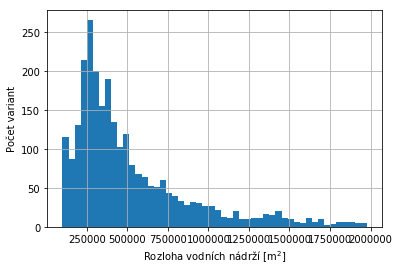

In [23]:
# histogram rozlohy vodnich nadrzi
d = df2.vodni_nadrz_rozloha[(df2.vodni_nadrz_rozloha >= 100000) & (df2.vodni_nadrz_rozloha <= 2*1000*1000)] 
# 100 000 m2 je podle oka malý rybník a 2*1000*1000 jsou 2 km2 = 1/8 území
dx = d.hist(bins=50)
dx.set_xlabel('Rozloha vodních nádrží [m$^2$]')
dx.set_ylabel('Počet variant')
# TODO jak s měřítkem na osách, rozloha > km2

In [210]:
# PODMÍNKA plocha jen vodních nádrží
vodni_nadrz_rozloha_min = 100000 # malý rybník
vodni_nadrz_rozloha_max = 2*1000*1000 # 1/8 území = 2km2

Text(0,0.5,u'Po\u010det variant')

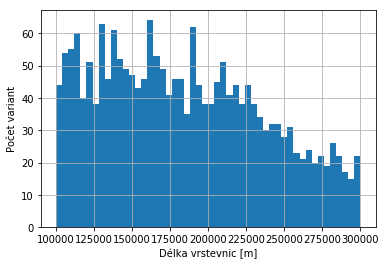

In [25]:
# histogram délky vrstevnic
d = df2.delka_vrstevnic[(df2.delka_vrstevnic >= 100000) & (df2.delka_vrstevnic <= 300000)] 
dx = d.hist(bins=50)
dx.set_xlabel(r'Délka vrstevnic [m]')
dx.set_ylabel(r'Počet variant')

In [211]:
# PODMÍNKA délka vrstevnic
delka_vrstevnic_min = 100000 # lehce < 25%
delka_vrstevnic_max = 600000 # o něco více než 75%

df2[(df2.delka_vrstevnic >= delka_vrstevnic_min) & 
    (df2.delka_vrstevnic <= delka_vrstevnic_max)].describe()

,vodni_nadrz_rozloha,delka_vrstevnic
count,2.330000e+03,2330.000000
mean,5.325243e+05,214422.775876
std,6.710838e+05,93007.477365
min,0.000000e+00,100010.750000
25%,2.420506e+05,145261.857500
50%,3.655924e+05,193538.575000
75%,6.002256e+05,255199.550000
max,8.039592e+06,597574.500000


In [212]:
# 2000 variant = podmínka vrstevnice AND vodní nádrže
vybrano2 = df2[(df2.delka_vrstevnic >= delka_vrstevnic_min) & 
                #(df2.delka_vrstevnic <= delka_vrstevnic_max) &
                (df2.vodni_nadrz_rozloha >= vodni_nadrz_rozloha_min) & 
                (df2.vodni_nadrz_rozloha <= vodni_nadrz_rozloha_max)]
vybrano2.describe()

,vodni_nadrz_rozloha,delka_vrstevnic
count,2.000000e+03,2000.000000
mean,5.042094e+05,215867.444890
std,3.412328e+05,99157.822758
min,1.002631e+05,100010.750000
25%,2.733348e+05,148426.945000
50%,3.882980e+05,195663.435000
75%,6.163902e+05,252871.277500
max,1.966621e+06,852194.700000


In [41]:
def splnuje (radek):
    return 1
    
vybrano2 = vybrano2.apply(splnuje, axis=1).to_frame()
vybrano2.columns = ['predvyber2000_ANO']
vybrano2.describe()

,predvyber2000_ANO
count,2000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [135]:
vybrano2_df2 = vybrano2.join(df2)

In [44]:
vybrano2_df2.to_csv('0_predvyber_analyza2000.csv')

### ? oprava: dopočítat vodní tok pro 3200-2000 území AND území bez vodní nádrže?

In [209]:
# doplněk k 2000 variantám = vodní nádrž < 100 000 m2 (ale již podmínka > 62 500 m2)
vybrano2_doplnek = df2[(df2.delka_vrstevnic >= delka_vrstevnic_min) & 
                #(df2.delka_vrstevnic <= delka_vrstevnic_max) &
                (df2.vodni_nadrz_rozloha < vodni_nadrz_rozloha_min)]
vybrano2_doplnek.describe()

,vodni_nadrz_rozloha,delka_vrstevnic
count,326.000000,326.000000
mean,32061.623344,303279.640245
std,29244.053008,192832.259346
min,0.000000,100210.100000
25%,7722.862500,142612.520000
50%,21820.370000,241763.640000
75%,53216.540000,456813.560000
max,99444.340000,944334.660000


In [216]:
vybrano2_doplnek = vybrano2_doplnek.apply(splnuje, axis=1).to_frame()
vybrano2_doplnek.columns = ['predvyber326_ANO']
vybrano2_doplnek_df2 = vybrano2_doplnek.join(df2)
vybrano2_doplnek_df2.head()

,predvyber326_ANO,vodni_nadrz_rozloha,delka_vrstevnic
ID,,,
1890,1,14898.46,121837.69
1891,1,23033.65,192319.73
4571,1,83201.73,256007.65
6081,1,23298.47,127916.40
6085,1,59310.99,112987.80


In [217]:
vybrano2_doplnek_df2.to_csv('0_predvyber_analyza326.csv')

### ??? + intersect s významnou rozvodnicí

### 3. výpočet pro 2000 území: vodní tok, který půlí území na 1/2, řády toků 

In [127]:
# TODO: vodní tok, který půlí ideálně na polovinu
df3 = pd.read_csv(r'C:\fenclova\diplomka\analyza\vysledky\Nove_predvyber_VodniTok.csv').set_index("ID")
df3.describe()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.659000,35.598500,285.298400,16.238000
std,8.524556,26.823293,6259.651068,6.138501
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,1.280000,13.000000
50%,0.000000,30.000000,2.130000,17.000000
75%,0.000000,48.000000,5.110000,20.000000
max,78.000000,187.000000,261222.820000,38.000000


Text(0,0.5,u'Po\u010det variant')

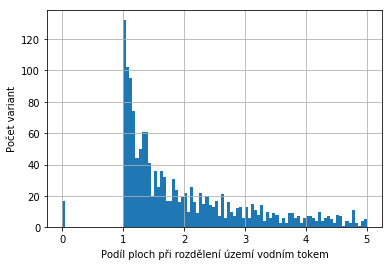

In [128]:
# histogram podilu ploch
d = df3.nejlepsi_podil_ploch[(df3.nejlepsi_podil_ploch <= 5)] 
dx = d.hist(bins=100)
dx.set_xlabel(r'Podíl ploch při rozdělení území vodním tokem')
dx.set_ylabel(r'Počet variant')

In [131]:
# kolik území podíl plochy na třetiny
df3.nejlepsi_podil_ploch[(df3.nejlepsi_podil_ploch <= 2)].describe() 

count    956.000000
mean       1.312092
std        0.328092
min        0.000000
25%        1.090000
50%        1.260000
75%        1.520000
max        2.000000
Name: nejlepsi_podil_ploch, dtype: float64

Text(0,0.5,u'Po\u010det pr\u016fse\u010d\xedk\u016f vodn\xedho toku s m\u0159\xed\u017ekou')

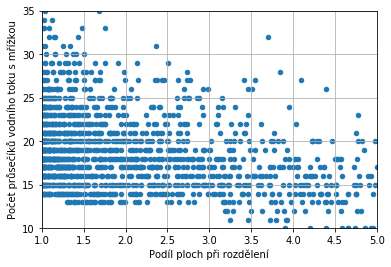

In [133]:
# závislost podílu ploch na poštu průsečíků s mřížkou
a = df3[(df3.nejlepsi_podil_ploch <= 5)]
ax= a.plot(x='nejlepsi_podil_ploch', y='pocet_pruseciku', 
                                                                kind='scatter', 
                                                                ylim={10, 35}, xlim={1,5}, 
                                                                grid=True)

ax.set_xlabel('Podíl ploch při rozdělení')
ax.set_ylabel('Počet průsečíků vodního toku s mřížkou')

# >> podíl ploch je důležitý, protože vybere hlavní tok v území
# ale náročnost záleží na počtu průsečíků

### TODO: dopočítat znovu i pro výběžky

In [83]:
# řeky řádovost
reky_delka = pd.read_csv(r'C:\fenclova\diplomka\analyza\vysledky\delka_vodnich_toku_1verze.csv').set_index('ID')
reky_delka.head()

,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
ID,,,,,,,,,,,,
18,29989.50,0.0,0.0,5265.47,12875.53,8978.29,2570.61,191.46,108.15,0.00,0.0,0.0
19,17390.63,0.0,0.0,2324.07,8914.97,5195.23,956.36,0.00,0.00,0.00,0.0,0.0
21,15933.14,0.0,0.0,0.00,4393.95,9385.00,1804.38,304.23,45.58,0.00,0.0,0.0
38,14776.24,0.0,0.0,0.00,4325.05,4687.96,3998.69,1507.86,160.84,95.84,0.0,0.0
76,14292.73,0.0,0.0,0.00,1943.40,4726.80,4705.02,1732.57,562.98,621.96,0.0,0.0


In [185]:
# funkce sečte kolik řádů má délku větší 500 m
def pocet_radu(radek):
    return len(filter(lambda x: x>500, list(radek)[3:]))

# pro všech 16 dílků spočti součet linii v každém čtverečku
pocet_radu = reky_delka.apply(pocet_radu, axis=1)
reky_delka["pocet_radu"] = pocet_radu

In [186]:
reky_delka.head()


,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,pocet_velke_radovosti,pocet_radu
ID,,,,,,,,,,,,,,
18,29989.50,0.0,0.0,5265.47,12875.53,8978.29,2570.61,191.46,108.15,0.00,0.0,0.0,4,4
19,17390.63,0.0,0.0,2324.07,8914.97,5195.23,956.36,0.00,0.00,0.00,0.0,0.0,4,4
21,15933.14,0.0,0.0,0.00,4393.95,9385.00,1804.38,304.23,45.58,0.00,0.0,0.0,3,3
38,14776.24,0.0,0.0,0.00,4325.05,4687.96,3998.69,1507.86,160.84,95.84,0.0,0.0,4,4
76,14292.73,0.0,0.0,0.00,1943.40,4726.80,4705.02,1732.57,562.98,621.96,0.0,0.0,6,6


In [187]:
df3_reky = df3.join(reky_delka)
df3_reky.tail()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,pocet_velke_radovosti,pocet_radu
ID,,,,,,,,,,,,,,,,,,
34254,1,10,0.00,0,14277.39,0.00,0.0,5805.73,7565.57,906.09,0.00,0.0,0.0,0.0,0.0,0.00,3,3
34255,2,15,0.00,0,17983.46,0.00,0.0,5861.68,6961.38,4815.60,344.80,0.0,0.0,0.0,0.0,0.00,3,3
34313,5,30,0.00,0,10528.89,0.00,0.0,1858.15,3859.66,4431.14,379.95,0.0,0.0,0.0,0.0,0.00,3,3
34342,41,72,0.00,0,25429.82,0.00,0.0,9866.66,9123.99,5083.69,1355.47,0.0,0.0,0.0,0.0,0.00,4,4
34423,14,48,2.28,15,26703.30,21614.16,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5089.14,1,1


In [188]:
df3_reky[(df3_reky.nejlepsi_podil_ploch >= 1) & (df3_reky.nejlepsi_podil_ploch <=2)
         & (df3_reky.pocet_pruseciku >= 5) # pojistka pro případ chyby při výpočtech
    & (df3_reky.pocet_radu >=2) # minimálně 2 řády
    & (df3_reky.pocet_radu <=4) # maximum řádů = 4
     & (df3_reky.r0 <= 1000) # mám určené řády pro většinu toků v území
     #& (df3_reky.celkova_delka <= 25000) # omezení délky vodních toků?
    ].describe()

,find_path_problem,end_start_kombinace,nejlepsi_podil_ploch,pocet_pruseciku,celkova_delka,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,pocet_velke_radovosti,pocet_radu
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2.800720,33.583433,1.340624,19.596639,20347.950528,11.750696,123.256795,1001.609760,2612.037755,4425.236843,5261.166062,4043.042665,2070.182701,673.721128,123.325150,2.621345,3.464586,3.464586
std,7.085749,24.936420,0.279133,4.354826,4864.475926,59.567955,771.936244,2359.008827,3867.735391,3843.774286,4166.334857,4151.328106,3214.542463,1747.157812,555.727532,24.206588,0.560311,0.560311
min,0.000000,3.000000,1.000000,13.000000,6666.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
25%,0.000000,16.000000,1.100000,16.000000,17072.220000,0.000000,0.000000,0.000000,0.000000,0.000000,1302.910000,178.940000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
50%,0.000000,27.000000,1.280000,19.000000,20167.060000,0.000000,0.000000,0.000000,0.000000,4769.200000,4993.930000,2687.170000,216.340000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,0.000000,45.000000,1.530000,22.000000,23569.370000,0.000000,0.000000,0.000000,5193.500000,6891.040000,8345.910000,6722.710000,3237.810000,298.830000,0.000000,0.000000,4.000000,4.000000
max,51.000000,187.000000,2.000000,38.000000,35289.340000,741.980000,7194.120000,12375.350000,19008.740000,14964.310000,15970.950000,17220.360000,15853.540000,12697.570000,5547.970000,386.600000,4.000000,4.000000
